<a href="https://colab.research.google.com/github/deathstar1/Exploration/blob/main/Changingepochs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf 

from tensorflow import keras

fashion_mnist = tf.keras.datasets.fashion_mnist

In [ ]:

(train_data , train_label) , (test_data , test_label ) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 22

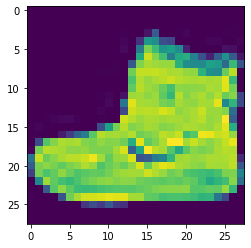

In [ ]:
import numpy as np 
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(train_data[0])
print(train_data[0])
print(train_label[0])
print(train_data.shape)

In [ ]:
train_data =  train_data/255.0

In [ ]:
test_data = test_data/255.0

In [52]:
class mycallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')< 0.18):
      self.model.stop_training = True

In [53]:
callbacks = mycallback()

In [54]:
model = tf.keras.Sequential([keras.layers.Flatten() ,
                            tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                            keras.layers.Dense(10, activation=tf.nn.softmax)])

In [57]:
model.compile(optimizer=tf.optimizers.Adam() , loss ='sparse_categorical_crossentropy', metrics = ['accuracy'] )

In [58]:
model.fit(train_data,train_label , epochs = 10, callbacks = [callbacks])

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4732 - accuracy: 0.8290
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3578 - accuracy: 0.8680
Epoch 3/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3205 - accuracy: 0.8813
Epoch 4/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2976 - accuracy: 0.8888
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2780 - accuracy: 0.8949
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2624 - accuracy: 0.9012
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2501 - accuracy: 0.9047
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2380 - accuracy: 0.9099
Epoch 9/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2268 - accuracy: 0.9141
Epoch 10/10
1875/1875 [==============================] - 12s 6ms/step - l

In [49]:
model.evaluate(test_data,test_label)

313/313 [==============================] - 1s 2ms/step - loss: 0.3374 - accuracy: 0.8927


[0.33735647797584534, 0.8927000164985657]

In [ ]:
classifications = model.predict(test_data)

[8.4558029e-16 1.0000000e+00 9.6381389e-15 2.3417441e-13 2.7887484e-15 7.5842103e-25 1.5091079e-14 7.8753645e-31 2.0755844e-17 1.0108925e-23]
[[0.         0.         0.         0.         0.         0.         0.         0.         0.00392157 0.         0.2627451  0.69411765 0.50588235 0.6        0.45882353 0.50588235 0.57254902
  0.55294118 0.68627451 0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.00784314 0.         0.76862745 1.         1.         1.         0.94509804 0.98431373 1.
  0.96078431 1.         0.29803922 0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.95294118 0.92941176 0.85098039 0.89411765 0.90588235 0.87058824 0.85490196
  0.85882353 1.         0.45490196 0.         0.   

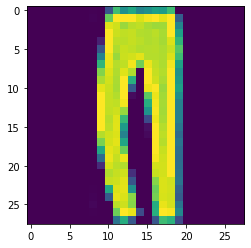

In [38]:
print(classifications[2])
print(test_data[2])

plt.imshow(test_data[2])